## Objetivos
- Realizar consultas sobre un entorno de programación en Python para analizar datos 
- Aplicar técnicas de tratamiento exploratorio de datos y realizar visualizaciones 
- Entender y comprender el uso de los entornos de programación y sus objetivos 
- Entender las diferentes posibilidades del uso de Pandas

## A entregar
- Carga de datos de csv (estaciones_bici.csv) en un DataFrame
- Obtención de número de estaciones con total de 30 
- Número de estación con la media más alta de bicis disponibles 
    * Partiendo de esta estación: 
        - Realizar el histograma de la estación de bicis disponibles 
        - Realizar gráfica con la línea temporal de bicis disponibles

In [2]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# la siguiente línea permitirá mostrar el gráfico sin necesidad de llamar luego a plt.show()
%matplotlib inline 

In [22]:
# Carga de datos en un dataframe, a partir del csv:
df_estaciones = pd.read_csv('./estaciones_bici.csv', delimiter=';')
df_estaciones.describe() # muestra estadísticas del dataframe

,Unnamed: 0,available,connected,estation,free,open,ticket,total
count,27547.000000,27547.000000,27547.000000,27547.000000,27547.000000,27547.0,27547.000000,27547.000000
mean,13773.000000,8.974444,0.996261,138.449196,10.629397,1.0,0.503794,19.915381
std,7952.278269,7.307137,0.061035,79.657747,7.492671,0.0,0.499995,5.570912
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,10.000000
25%,6886.500000,3.000000,1.000000,69.000000,4.000000,1.0,0.000000,15.000000
50%,13773.000000,8.000000,1.000000,139.000000,10.000000,1.0,1.000000,20.000000
75%,20659.500000,14.000000,1.000000,207.000000,15.000000,1.0,1.000000,20.000000
max,27546.000000,40.000000,1.000000,276.000000,40.000000,1.0,1.000000,40.000000


In [4]:
df_estaciones # muestra todas las filas del dataframe (en realidad solo las 5 primeras y 5 últimas)

,Unnamed: 0,_id,available,connected,download_date,estation,free,open,ticket,total,updated
0,0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000
...,...,...,...,...,...,...,...,...,...,...,...
27542,27542,5c61face25541729b7d57419,0,1,2019-02-11 23:44:00.786,260,20,1,0,20,2019-02-11 23:42:16.000
27543,27543,5c61face25541729b7d5741a,15,1,2019-02-11 23:44:00.786,261,4,1,0,19,2019-02-11 23:39:16.000
27544,27544,5c61face25541729b7d5741b,1,1,2019-02-11 23:44:00.786,268,9,1,1,10,2019-02-11 23:42:16.000
27545,27545,5c61face25541729b7d5741c,1,1,2019-02-11 23:44:00.786,269,14,1,0,15,2019-02-11 23:39:16.000


In [5]:
print(len(df_estaciones)) # muestra cuántas estaciones hay en total

27547


In [6]:
df_estaciones.head() # muestra solo las 5 primeras filas del dataframe

,Unnamed: 0,_id,available,connected,download_date,estation,free,open,ticket,total,updated
0,0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000


In [7]:
# Obtención de número de estaciones con "total" de 30
#consulta1 = df_estaciones[df_estaciones['total']==30]
#print(consulta1) # muestra las estaciones que cumplen la condición
#print(len(consulta1)) # muestra cuántas estaciones cumplen la condición
df_estaciones.query('total==30').total.count()

1098

In [56]:
# Número de estación con la media más alta de bicis disponibles
# Agrupamos por "estation" y obtenemos el promedio de "available"

#df_estaciones.groupby('estation').mean() # muestra estadísticas agrupando por 'estation'
#df_estaciones.groupby('estation')['available'].aggregate([max]) # muestra el máximo valor de available por cada estación
# df_estaciones.groupby('estation')['available'].mean() # muestra la media por cada estación

ls_estaciones = df_estaciones.groupby('estation')['available'].mean() # obtenemos lista con la media por cada estación
df2 = pd.DataFrame(ls_estaciones) # convierte el resultado anterior a DataFrame usando la librería Pandas
df2 = df2.rename(columns={"available": "average_available"}) # renombramos columna 'available' a 'average_available'
#mas_alta = df2.aggregate([max]).round(2) # obtenemos la media más alta de bicis disponibles, redondeada a 2 decimales
#mas_alta
df2.average_available = df2.average_available.round(2) # modificamos la columna 'average_available' para tener solo 2 decimales
df2 = df2.sort_values('average_available', ascending=False) # ordenamos las filas descendentemente por average_available
df2 = df2.head(1) # nos quedamos con la primera: la más alta
#df2 # muestra la estación y su media, que es la más alta de todas.

# con lo anterior sería suficiente pero vamos a guardar el número de estación en una variable
##df2.index
estacion = df2.index[0] #'station' forma parte del índice, el primer valor que retorna el método index es el número del índice
estacion

50

(array([8202., 5379., 4440., 4365., 2789., 1403.,  525.,  183.,  150.,
         111.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

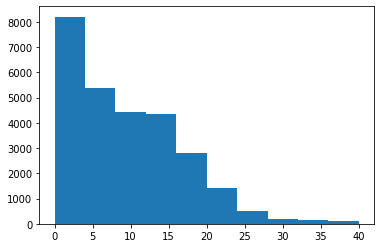

In [37]:
# Realizar el histograma de la estación de bicis disponibles
df_estaciones.query('estation==@estacion')
plt.hist(df_estaciones["available"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 <a list of 100 Text xticklabel objects>)

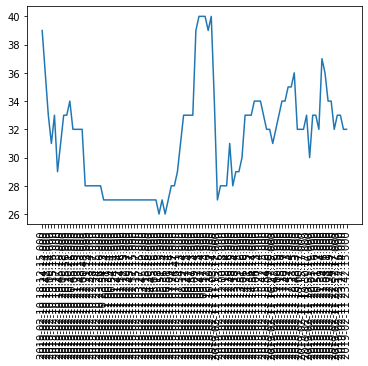

In [54]:
# Realizar gráfica con la línea temporal de bicis disponibles

# Nos quedamos solo con los de la estación anterior
df3 = df_estaciones.query('estation==@estacion')
# A partir del dataframe anterior nos quedamos solo con las columnas 'updated' y 'available'
df3 = df3.loc[:, ['updated', 'available']]
# Ordenar la serie temporal
df3 = df3.sort_values('updated', ascending=True)
# Plotear la serie
plt.plot(df3['updated'], df3['available'])
plt.xticks(rotation='vertical')